In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import warnings
warnings.filterwarnings("ignore")

In [2]:
symbol = 'AAPL'
start = '2021-01-01'
end = '2021-12-31'
df2 = web.DataReader(symbol,"yahoo",start,end)

df2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.515976
2021-01-04,133.610001,126.760002,133.520004,129.410004,143301900.0,128.264984
2021-01-05,131.740005,128.429993,128.889999,131.009995,97664900.0,129.850815
2021-01-06,131.050003,126.379997,127.720001,126.599998,155088000.0,125.479843
2021-01-07,131.630005,127.860001,128.360001,130.919998,109578200.0,129.761627


In [4]:
df2.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,142.317748,139.443438,140.835060,140.956561,9.055859e+07,140.192837
std,14.733973,14.425786,14.470832,14.639766,2.914508e+07,14.781327
min,120.400002,116.209999,119.029999,116.360001,4.100000e+07,115.502792
25%,130.449997,127.129997,128.779999,128.979996,6.902310e+07,127.838799
50%,142.210007,138.369995,140.070007,141.110001,8.567190e+07,140.518616
75%,149.830002,147.679993,148.820007,148.960007,1.066867e+08,148.266006
max,182.130005,178.529999,181.119995,180.330002,1.954327e+08,179.836319


In [11]:
high = 170
low = 130

In [14]:
# As default, set everything to 0
df2['Signal'] = 0
 
# If stock is more than 170, and we set the signal to -1 which means: 'short'
df2.loc[df2['Adj Close'] > high, 'Signal'] = -1
 
# If stock is less than 130, and we set the signal to 1 which means: 'long'
df2.loc[df2['Adj Close'] < low, 'Signal'] = 1
 
buys = df2.loc[df2['Signal'] == 1]
sells = df2.loc[df2['Signal'] == -1]

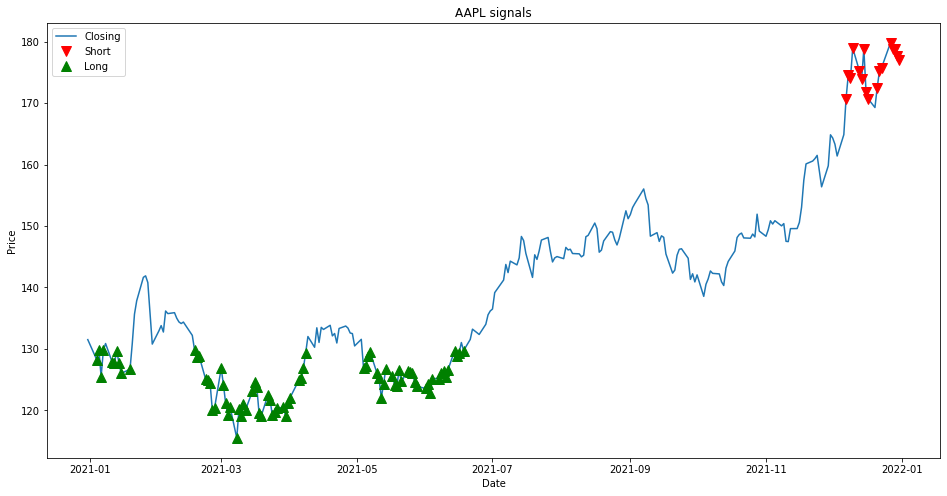

In [15]:
plt.figure(figsize=(16,8))
plt.plot(df2.index, df2['Adj Close'], label='Closing')
plt.plot(sells.index, df2.loc[sells.index]['Adj Close'],'v', markersize=10, color='r', label='Short')
plt.plot(buys.index, df2.loc[buys.index]['Adj Close'], '^', markersize=10, color='g', label='Long')
plt.title(symbol + ' signals')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()